# Q1. Given a signed 32-bit integer x, return x with its digits reversed. If reversing x causes the value to go outside the signed 32-bit integer range [-2<sup>31</sup>, 2<sup>31</sup> - 1], then return 0.
## 
Assume the environment does not allow you to store 64-bit integers (signed or unsigned).## 

Example <b>1:

</b>Input: x =<b> 123
</b>
Out"]], word = "ABCCED"

Output: true

In [1]:
#region Business Logic

def reverse_int32(number: int) -> int:
    '''
    Provides a reversed number of a provided `number` that is strictly limited to a 32-bit signed integer.

    Parameters:
    number: int (Signed 32-bit)
        A 32-bit signed integer for finding the reverse of it.

    Returns:
    int (Signed 32-bit)
        Reversed digits of a 32-bit signed integer as provided in the parameter.

    Examples:
    Input: number = 123
    Output: 321
    '''

    # Provide 0 when the number is above 32-bit length.
    return int(str(number)[ : : -1]) if number.bit_length() < 32 else 0

#endregion

#region Input

number = int(input('Enter a 32-bit number: '))

#endregion

#region Output

'Reverse Digit: {}'.format(reverse_int32(number = number))

#endregion

Enter a 32-bit number:  2147483647


'Reverse Digit: 7463847412'

# Q2. You are given an n x n 2D matrix representing an image, rotate the image by 90 degrees (clockwise).

## You have to rotate the image in place, which means you have to modify the input 2D matrix directly. DO NOT allocate another 2D matrix and do the rotation.

## Example 1:

<img src = 'https://moodle.cestarcollege.com/moodle/pluginfile.php/2124892/mod_assign/intro/image.png' />

<b>Input:</b> matrix = [[1,2,3],
                        [4,5,6],
                        [7,8,9]]

<b>Output:</b> [[7,4,1],
                [8,5,2],
                [9,6,3]]

<font color = 'FFA500'><h1>Idea:</h1></font><br>
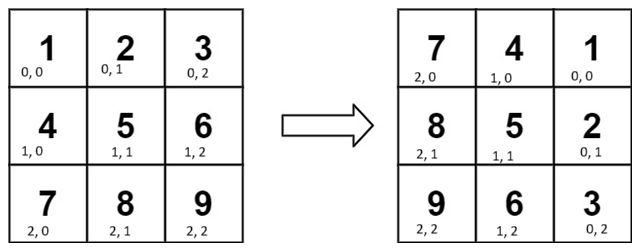

In [2]:
##### region Dependencies

import numpy as np

#endregion

#region Business Logic

def rotate_matrix(matrix: np.array, rotation: int = 90) -> np.array:
    '''
    Rotates a given n x n 2D `matrix` by the provided `rotation` angle.

    Parameters:
    matrix: np.array
        A n x n 2D matrix to rotate.
    rotation: int
        Future development: Switching between various rotational angles for better functionality.
        Rotates the matrix in the provided angle.

    Returns:
    np.array
        A n x n 2D matrix having values rotated.

    Examples:
    Input: matrix = [[1, 2, 3],
                    [4, 5, 6],
                    [7, 8, 9]]
    Output: [[7, 4, 1],
            [8, 5, 2],
            [9, 6, 3]]
    '''

    # Validating if the rotation is possible.
    if matrix.shape[0] == matrix.shape[1]:

        #region Matrix Rotation

        # When Rotation = 90°
        if rotation == 90:
            return matrix[ : : -1].transpose()

        #endregion

    else:
        # Provide the matrix as it is.
        return matrix # Can also raise an exception of TypeError or ValueError.

#endregion

#region Input

# Creating a dummy array having the following configurations.
dimension = 40000
matrix_2d = np.arange(1, (dimension ** 2) + 1).reshape(dimension, dimension)
print('Input:\n{}\nDimensions: {} x {}'.format(matrix_2d, matrix_2d.shape[0], matrix_2d.shape[1]))

#endregion

#region Output

print('-' * 17)
print('Output:\n{}'.format(rotate_matrix(matrix = matrix_2d)))

#endregion

Input:
[[         1          2          3 ...      39998      39999      40000]
 [     40001      40002      40003 ...      79998      79999      80000]
 [     80001      80002      80003 ...     119998     119999     120000]
 ...
 [1599880001 1599880002 1599880003 ... 1599919998 1599919999 1599920000]
 [1599920001 1599920002 1599920003 ... 1599959998 1599959999 1599960000]
 [1599960001 1599960002 1599960003 ... 1599999998 1599999999 1600000000]]
Dimensions: 40000 x 40000
-----------------
Output:
[[1599960001 1599920001 1599880001 ...      80001      40001          1]
 [1599960002 1599920002 1599880002 ...      80002      40002          2]
 [1599960003 1599920003 1599880003 ...      80003      40003          3]
 ...
 [1599999998 1599959998 1599919998 ...     119998      79998      39998]
 [1599999999 1599959999 1599919999 ...     119999      79999      39999]
 [1600000000 1599960000 1599920000 ...     120000      80000      40000]]


# Q3. Given an m x n grid of characters board and a string word, return true if the word exists in the grid.

## The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

## Example 1:

<img src = 'https://moodle.cestarcollege.com/moodle/pluginfile.php/2124892/mod_assign/intro/image%20%281%29.png' />

<b>Input:</b> board = [["A","B","C","E"],
                       ["S","F","C","S"],
                       ["A","D","E","E"]],
              word = "ABCCED"

<b>Output:</b> True

## Approach:
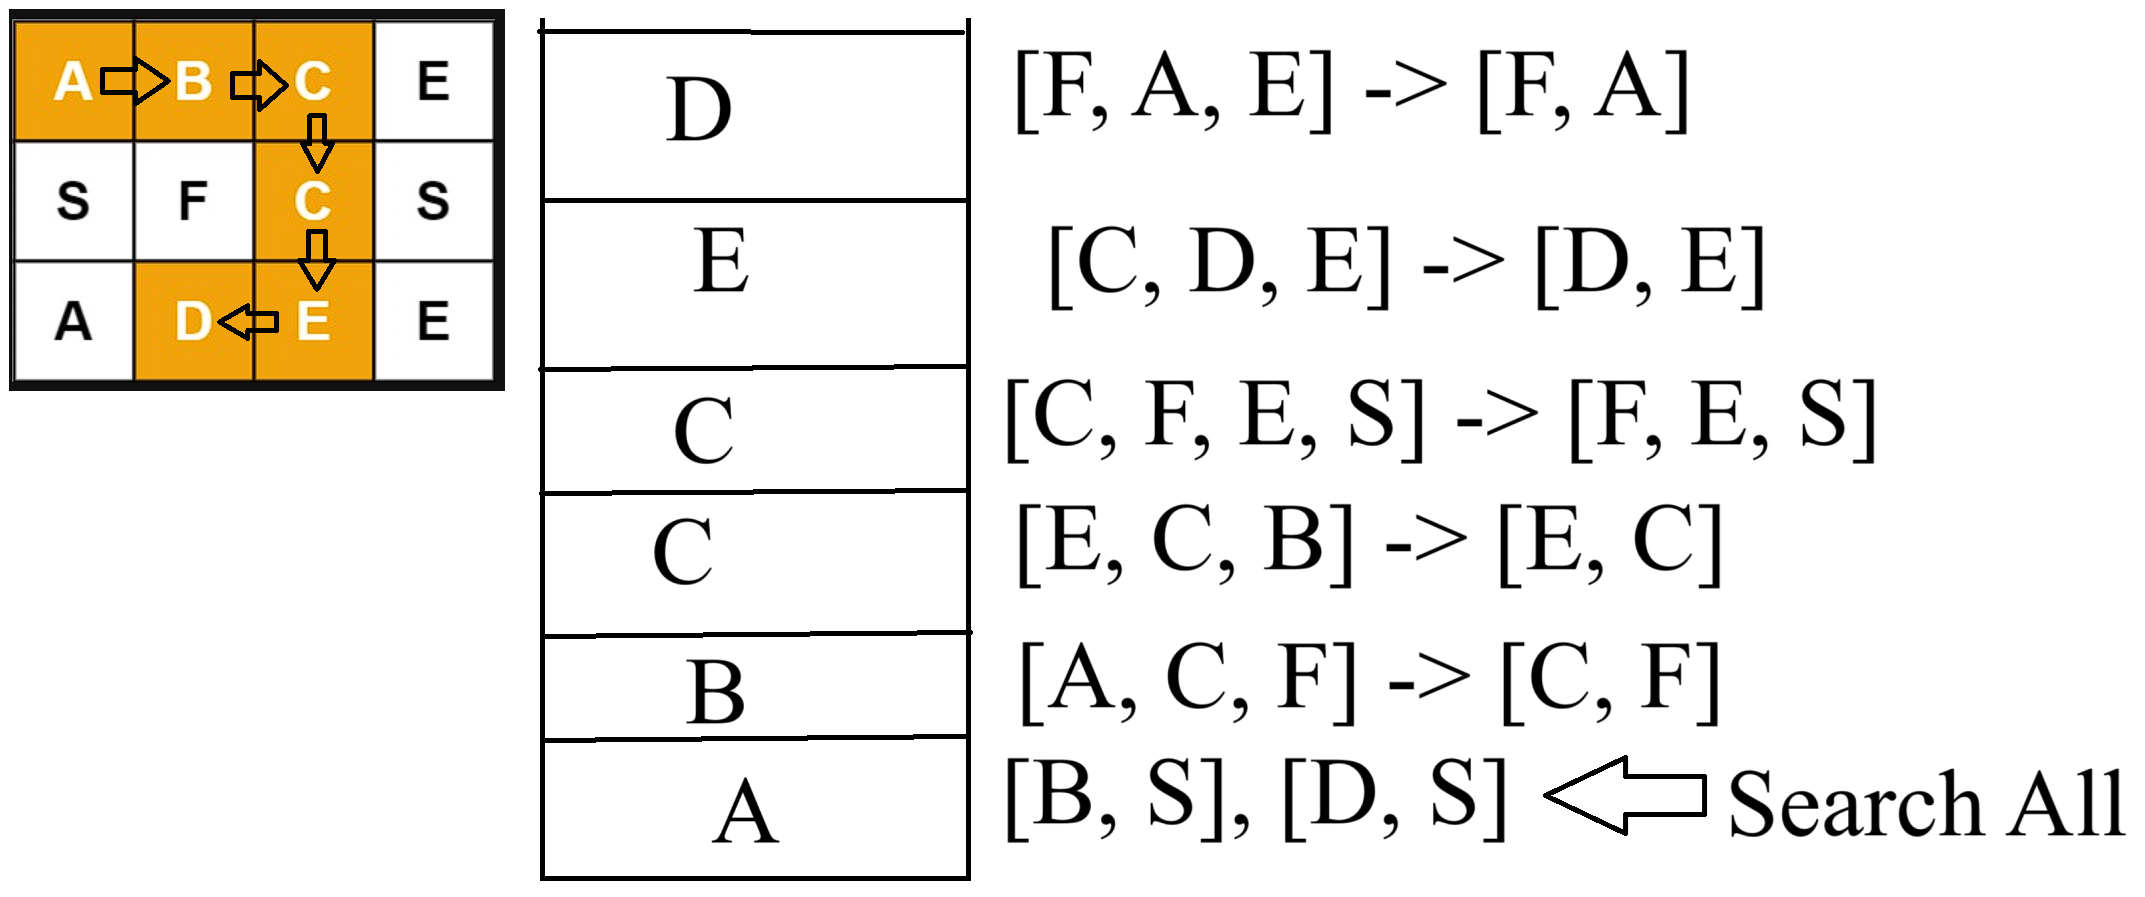

# Failed Approach

In [3]:
### region Business Logic

class CharacterBoard():

    def __init__(self, word_matrix: list):

        self.word_matrix = word_matrix

        # Indices where the words are already found.
        # Hence, restricting backpropagation.
        self.traversal_indices = list()
        
        # Dimension = (Row, Column)
        self.dimension = (len(word_matrix), len([char for char in word_matrix[0]]))

    def get_adjacent_positions(self, row: int, column: int) -> list:
        '''
        Fetches the adjacent positions for the given position (`row` and `column`).

        Parameters:
        row: int
            Position of the row in terms of index value.
        column: int
            Position of the column in terms of column value.

        Returns:
        str
            A list of tuples having adjacent positions.

        Examples:
        
        Input: self.word_matrix = [
            ['A', 'B', 'C', 'E'],
            ['S', 'F', 'C', 'S'],
            ['A', 'D', 'E', 'E']
        ]
        row = 1
        column = 1
        
        Output = ['B', 'D', 'S', 'C'] -> [(1, 0), (2, 1), (1, 0), (1, 2)]
        '''

        # Number of adjacent indices.
        adjacent_positions = []

        # Above Position.
        if row > 0:
            adjacent_positions.append([row - 1, column])

        # Below Position.
        if row + 1 < self.dimension[0]:
            adjacent_positions.append([row + 1, column])

        # Left Position.
        if column > 0:
            adjacent_positions.append([row, column - 1])

        # Right Position.
        if column + 1 < self.dimension[1]:
            adjacent_positions.append([row, column + 1])

        return adjacent_positions

    def get_adjacent_words(self, row: int, column: int) -> list:
        '''
        Fetches the adjacent positions for the given position (`row` and `column`).

        Parameters:
        row: int
            Position of the row in terms of index value.
        column: int
            Position of the column in terms of column value.

        Returns:
        str
            A list of characters/strings having the adjacent positions.

        Examples:

        Input: self.word_matrix = [
            ['A', 'B', 'C', 'E'],
            ['S', 'F', 'C', 'S'],
            ['A', 'D', 'E', 'E']
        ]
        row = 1
        column = 1
        
        Output = [(1, 0), (2, 1), (1, 0), (1, 2)] -> ['B', 'D', 'S', 'C']
        '''

        # Number of adjacent words.
        adjacent_words = []

        # Above Position.
        if row > 0:
            adjacent_words.append(self.word_matrix[row - 1][column])

        # Below Position.
        if row + 1 < self.dimension[0]:
            adjacent_words.append(self.word_matrix[row + 1][column])

        # Left Position.
        if column > 0:
            adjacent_words.append(self.word_matrix[row][column - 1])

        # Right Position.
        if column + 1 < self.dimension[1]:
            adjacent_words.append(self.word_matrix[row][column + 1])

        return adjacent_words

    def get_adjacent_words_and_positions(self, row: int, column: int) -> dict:
        '''
        A combination of `get_adjacent_positions()` and `get_adjacent_words()` provides a dictionary of both functions' outputs.

        Parameters:
        row: int
            Position of the row in terms of index value.
        column: int
            Position of the column in terms of column value.

        Returns:
        str
            A tuple of characters/strings having adjacent positions.

        Examples:

        Input: self.word_matrix = [
            ['A', 'B', 'C', 'E'],
            ['S', 'F', 'C', 'S'],
            ['A', 'D', 'E', 'E']
        ]
        row = 1
        column = 1
        
        Output = { 'B' : (1, 0), 'D' : (2, 1), 'S' : (1, 0), 'C' : (1, 2) }
        '''

        return dict(zip(self.get_adjacent_words(row = row, column = column),
                        self.get_adjacent_positions(row = row, column = column)))

    def is_character_in_board(self, character : str) -> bool:
        '''
        Validates whether the given `character` exists in the `self.word_list`.

        Parameters:
            character (str): A character in the game board initialized to search.

        Returns:
            (bool): True when the given `character` is in the `self.word_list`.
        '''

        return any([True for character_set in self.word_matrix if character in character_set])

    def get_indices(self, character : str) -> list[list] | None:
        '''
        Determines whether the given `character` exists in the game board and gets its coordinates.

        Parameters:
            character (str): A character to search the index number from the game board.

        Returns:
            (list[list] | None): A list of coordinates to the specific `character` in the game board and provides for all sets of possible characters; None when not found.
        '''

        # Validating whether the character exists on the board.
        if self.is_character_in_board(character = character):

            # Filling an empty list as the coordinates might not be found for an alien input.
            indices = list()
    
            # Iterating through each row.
            for row_characters in self.word_matrix:
    
                # Fill the list with the coordinates found.
                indices.append([[self.word_matrix.index(row_characters), row_characters.index(column_character)] for column_character in row_characters if character == column_character])
    
            # Return the indices found.
            # It could be an empty list.
            # Also, removing the empty lists.
            return [row_characters[0] for row_characters in indices if row_characters]

        # Provide None when the character does not exist on the game board.
        return None

    def is_path_matching(self, words: str) -> bool:
        '''
        Determines whether the given `words` match the path of the words on the board.
    
        Parameters:
        words: str
            A sequence of characters to find from the board.
    
        Returns:
        bool
            Does the path match the words on the board?
        '''

        #region First Character Exists on the Game Board

        # Fetching the indices for the first word.
        first_indices = self.get_indices(words[0])

        # Validating on whether the list contains some indices.
        if first_indices:

            # Finding the Words using the Breadth First Search Technique.
            self.traversal_indices.append(first_indices[0])

        #endregion

            iteration = 1
            indices = first_indices

            # Iterating over each character provided to follow the path of the game board.
            while iteration < len(words):

                # Execute when the character exists in the matrix.
                if self.is_character_in_board(character = words[iteration]):

                    # Finding the adjacent words to match with the given character sequence.
                    adjacent_data = self.get_adjacent_words_and_positions(row = indices[0][0], column = indices[0][1])
                    print(adjacent_data)

                    try:
                        # When the next character is not one from already discovered indices.
                        if adjacent_data[words[iteration]] not in self.traversal_indices:
        
                            # If the next character is adjacent to the current block found.
                            self.traversal_indices.append(adjacent_data[words[iteration]])
                            print(self.word_matrix[adjacent_data[words[iteration]][0]][adjacent_data[words[iteration]][1]], adjacent_data[words[iteration]])
        
                            # Finding indices for the next character.
                            indices = self.get_indices(character = words[iteration])
        
                        elif False:
                            # Look if any other letter matches our requirements.
                            pass

                    except KeyError:
                        # This means we are at the last character in the given word.
                        # Hence, we need to find its adjacent positions and whether that letter exists in the game board at its appropriate position.
                        return False
    
                    iteration += 1

                else:
                    return False
    
            return True

        return False

#endregion

#region Input

word_list = [['A', 'B', 'C', 'E'],
             ['S', 'F', 'C', 'S'],
             ['A', 'D', 'E', 'E']]

words = 'ABCCED'
words = 'ABFC'

#endregion

#region Execution and Output

cb = CharacterBoard(word_matrix = word_list)

cb.is_path_matching(words = words)

#endregion

{'S': [1, 0], 'B': [0, 1]}
B [0, 1]
{'F': [1, 1], 'A': [0, 0], 'C': [0, 2]}
F [1, 1]
{'B': [0, 1], 'D': [2, 1], 'S': [1, 0], 'C': [1, 2]}
C [1, 2]


True

# Solution

In [4]:
#region Business Logic

class WordSearch():

    def __init__(self, board : list[list[str]], words : str) -> None:
        self.board = board
        self.words = words

    def is_victory(self):
        rows, columns = len(self.board), len(self.board[0])

        #region Nested Method

        def depth_first_search(row : int, column : int, index : int) -> bool:
    
            if index != len(self.words):
    
                if 0 <= row < rows and \
                   0 <= column < columns and \
                   self.board[row][column] == self.words[index] and \
                   not visited[row][column]:
    
                    visited[row][column] = True
    
                    for adjacent_row, adjacent_column in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
    
                        if (depth_first_search(row + adjacent_row, column + adjacent_column, index + 1)):
    
                            return True
    
                    visited[row][column] = False
    
                return False
            else:
                return True

        #endregion

        visited = [[False for _ in range(columns)] for _ in range(rows)]

        for row in range(rows):

            for column in range(columns):

                if depth_first_search(row = row, column = column, index = 0):

                    return True

        return False

#endregion

#region Input

word_cloud = [['A', 'B', 'C', 'E'],
              ['S', 'F', 'C', 'S'],
              ['A', 'D', 'E', 'E']]

word_sequence = 'ASFBCESCEDA'

#endregion

#region Output

print('Sequence Found!' if WordSearch(board = word_cloud, words = word_sequence).is_victory() else 'Sequence Not Found.')

#endregion

Sequence Found!
